# Multivariate Time Series Analysis on Visakhapatnam Air Quality Data Using    Lstm 

Problem statement :- 


### Life Cycle of Project.

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
## Data Analysis phase
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns 
from scipy.stats import norm 
from matplotlib import pyplot

pd.pandas.set_option("display.max_columns",None)

### Let's load the dataset of Visakhapatanam

In [2]:
dataset = pd.read_excel('Raw.xlsx')
## print shape of dataset
print (dataset.shape)

(32893, 19)


## Data Analysis Part starts

Here we will explore our dataset and try to find all missing values and numerical value, outliers, categorical avariables and relationship between all the features.

In [3]:
dataset.dtypes

Date       datetime64[ns]
Time               object
AT                float64
PM10              float64
PM2.5             float64
Temp              float64
WD                float64
RH                float64
SR                float64
Benzene           float64
Toluene           float64
NH3               float64
NO                float64
NO2               float64
NOx               float64
Ozone             float64
SO2               float64
CO                float64
Xylene            float64
dtype: object

In [4]:
dataset=dataset.drop(['Time'], axis = 1)


In [5]:
type(dataset)

pandas.core.frame.DataFrame

#### Our data contains 18 feature from them 12 features are pollutant and remaining 5 are meteorological features.

### Let's find the missing values in dataset

In [6]:
## Finding Missing values.
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()]
for feature in features_with_na:
    print(feature , np.round(dataset[feature].isnull().mean(),4)*100,'% missing values')

AT 10.31 % missing values
PM10 11.600000000000001 % missing values
PM2.5 12.049999999999999 % missing values
Temp 9.84 % missing values
WD 9.83 % missing values
RH 9.83 % missing values
SR 9.83 % missing values
Benzene 9.91 % missing values
Toluene 9.91 % missing values
NH3 11.31 % missing values
NO 9.86 % missing values
NO2 10.16 % missing values
NOx 9.82 % missing values
Ozone 10.34 % missing values
SO2 12.15 % missing values
CO 10.14 % missing values
Xylene 9.91 % missing values


 Here we can see the precentage of Nan or missing value in every feature

#### Set Date as Index

In [7]:
dataset.set_index('Date')


,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylene
Date,,,,,,,,,,,,,,,,,
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,19.23,NaN,48.25,30.05,84.50,66.75,7.0,5.17,9.40,10.35,2.10,46.02,26.18,79.72,0.9,1.02,3.00
2019-12-30,19.02,NaN,49.25,29.88,214.00,67.00,7.0,5.17,9.45,10.30,4.80,66.55,39.30,61.88,0.3,1.44,2.88
2019-12-30,18.30,NaN,56.75,29.70,248.25,67.25,7.0,6.33,12.25,10.40,3.08,55.60,32.05,61.25,0.9,1.23,4.12


In [8]:
dataset = pd.read_excel('Raw.xlsx',index_col=[0],parse_dates=True,squeeze=True)

In [9]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32893 entries, 2016-07-01 to 2019-12-31
Data columns (total 18 columns):
Time       32893 non-null object
AT         29503 non-null float64
PM10       29079 non-null float64
PM2.5      28930 non-null float64
Temp       29657 non-null float64
WD         29659 non-null float64
RH         29659 non-null float64
SR         29659 non-null float64
Benzene    29634 non-null float64
Toluene    29634 non-null float64
NH3        29174 non-null float64
NO         29650 non-null float64
NO2        29550 non-null float64
NOx        29662 non-null float64
Ozone      29492 non-null float64
SO2        28896 non-null float64
CO         29557 non-null float64
Xylene     29634 non-null float64
dtypes: float64(17), object(1)
memory usage: 4.8+ MB


 Information of dataset

In [11]:
dataset.count()

Time       32893
AT         29503
PM10       29079
PM2.5      28930
Temp       29657
WD         29659
RH         29659
SR         29659
Benzene    29634
Toluene    29634
NH3        29174
NO         29650
NO2        29550
NOx        29662
Ozone      29492
SO2        28896
CO         29557
Xylene     29634
dtype: int64

Number of count of every feature

In [12]:
missing = dataset.isna()

missing.head()

,Time,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylene
Date,,,,,,,,,,,,,,,,,,
2016-07-01,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2016-07-01,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2016-07-01,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2016-07-01,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2016-07-01,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [13]:
missing.dtypes

Time       bool
AT         bool
PM10       bool
PM2.5      bool
Temp       bool
WD         bool
RH         bool
SR         bool
Benzene    bool
Toluene    bool
NH3        bool
NO         bool
NO2        bool
NOx        bool
Ozone      bool
SO2        bool
CO         bool
Xylene     bool
dtype: object

#### Checking missing values using different ways

In [14]:
dataset.isnull().mean() * 100

Time        0.000000
AT         10.306144
PM10       11.595172
PM2.5      12.048156
Temp        9.837959
WD          9.831879
RH          9.831879
SR          9.831879
Benzene     9.907883
Toluene     9.907883
NH3        11.306357
NO          9.859241
NO2        10.163257
NOx         9.822759
Ozone      10.339586
SO2        12.151522
CO         10.141975
Xylene      9.907883
dtype: float64

In [15]:
(missing.mean())*100

Time        0.000000
AT         10.306144
PM10       11.595172
PM2.5      12.048156
Temp        9.837959
WD          9.831879
RH          9.831879
SR          9.831879
Benzene     9.907883
Toluene     9.907883
NH3        11.306357
NO          9.859241
NO2        10.163257
NOx         9.822759
Ozone      10.339586
SO2        12.151522
CO         10.141975
Xylene      9.907883
dtype: float64

### Finding relationships between Dependent variables and Nan values

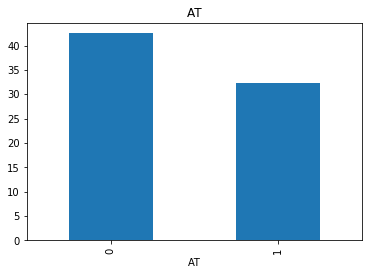

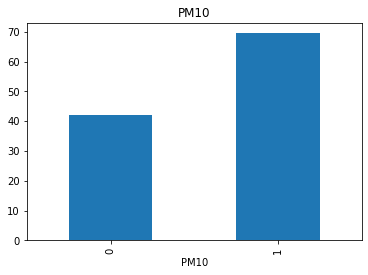

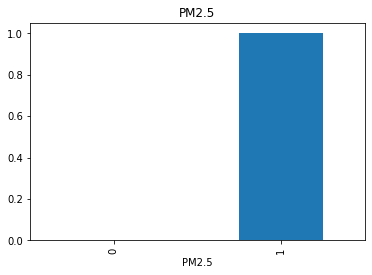

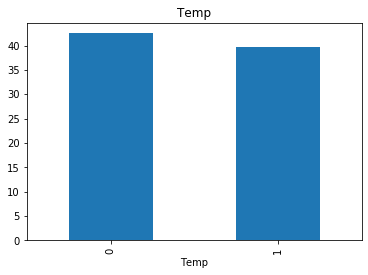

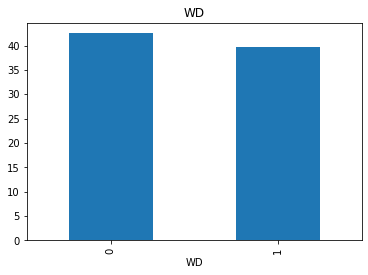

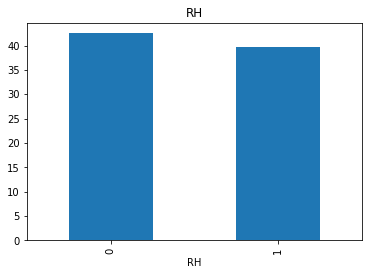

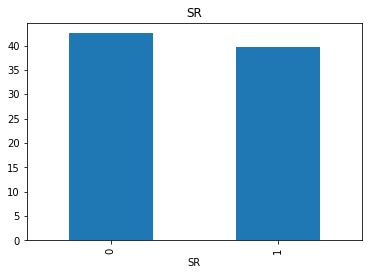

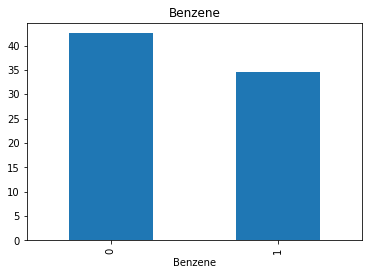

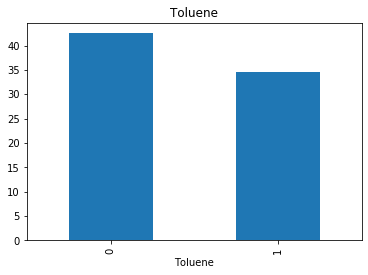

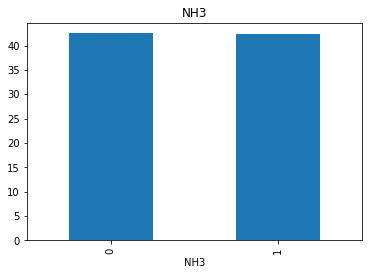

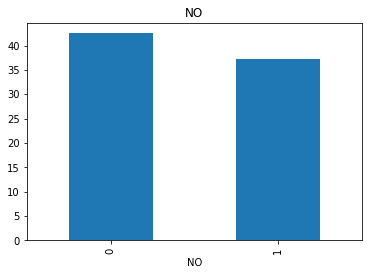

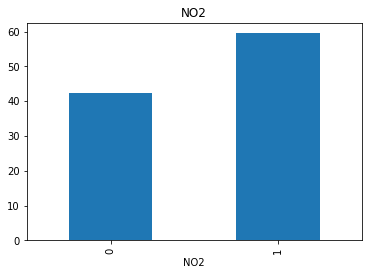

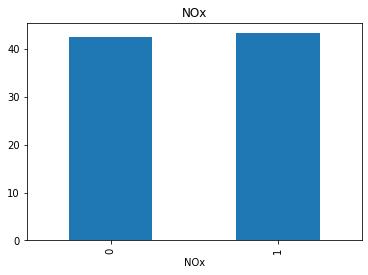

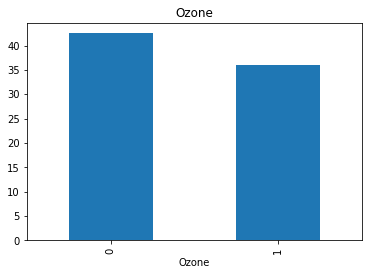

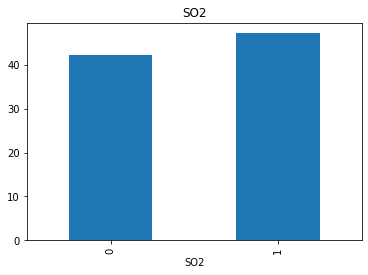

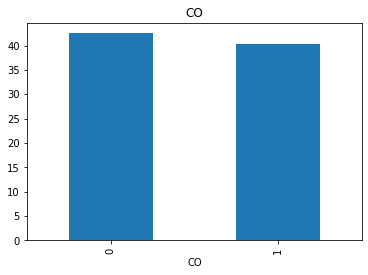

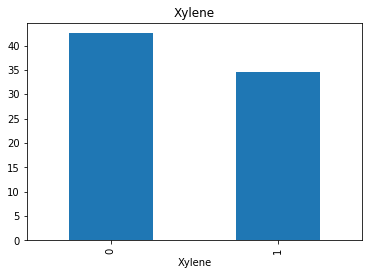

In [16]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean PM2.5 where the information is missing or present
    data.groupby(feature)['PM2.5'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here with the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

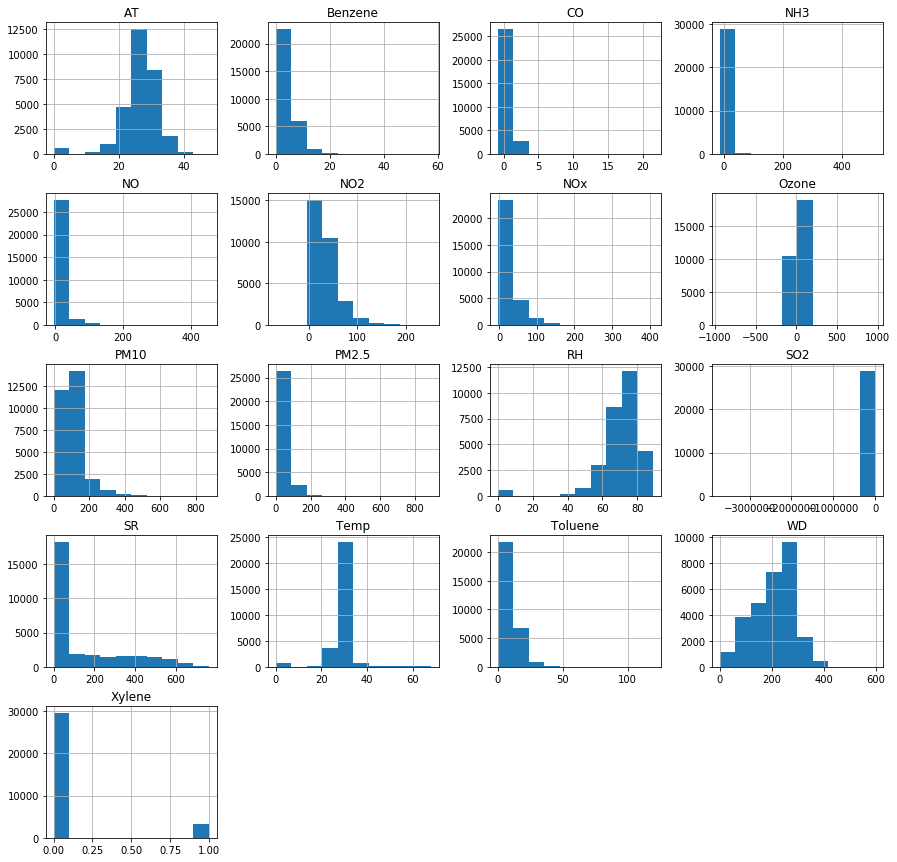

In [17]:

# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = data.hist(figsize = (15,15))

###  We will check the relation between years and the value of PM2.5

Text(0.5, 1.0, 'PM2.5 vs Date')

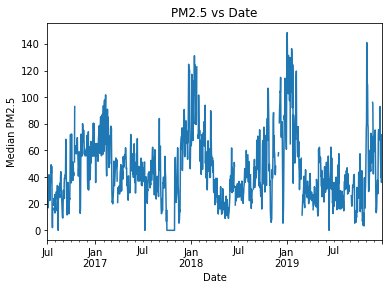

In [18]:
dataset.groupby('Date')['PM2.5'].median().plot()
plt.xlabel('Date')
plt.ylabel('Median PM2.5')
plt.title("PM2.5 vs Date")


So here we can say that due to missing values the graph is not in proper way.

In [19]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].tail()

Number of numerical variables:  17


,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylene
Date,,,,,,,,,,,,,,,,,
2019-12-30,19.23,NaN,48.25,30.05,84.50,66.75,7.0,5.17,9.40,10.35,2.10,46.02,26.18,79.72,0.9,1.02,3.00
2019-12-30,19.02,NaN,49.25,29.88,214.00,67.00,7.0,5.17,9.45,10.30,4.80,66.55,39.30,61.88,0.3,1.44,2.88
2019-12-30,18.30,NaN,56.75,29.70,248.25,67.25,7.0,6.33,12.25,10.40,3.08,55.60,32.05,61.25,0.9,1.23,4.12
2019-12-30,17.67,NaN,49.25,29.65,293.00,66.75,7.0,5.70,12.10,10.38,5.60,54.35,33.48,60.77,NaN,1.02,2.72
2019-12-31,17.30,NaN,47.00,29.70,295.00,67.00,7.0,5.05,16.70,10.00,1.60,39.05,22.05,70.00,2.3,0.92,1.90


In [20]:
dataset.describe()


,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylene
count,29503.000000,29079.000000,28930.000000,29657.000000,29659.000000,29659.000000,29659.000000,29634.000000,29634.000000,29174.000000,29650.000000,29550.000000,29662.000000,29492.000000,2.889600e+04,29557.000000,29634.000000
mean,26.657450,104.798583,47.708166,28.886995,207.691578,70.305683,137.565570,4.326784,9.256889,10.098107,12.178881,33.281765,26.999956,37.615887,-1.129730e+02,0.758989,3.038491
std,5.878584,65.990475,35.635927,5.759475,79.887293,12.955113,190.922564,3.060281,6.849838,9.608830,19.974511,26.381684,26.082689,42.485986,2.186679e+04,0.735048,3.797984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.850000,-4.280000,-68.230000,-3.600000,-940.000000,-3.717037e+06,-0.840000,0.000000
25%,24.350000,65.500000,26.000000,28.320000,153.000000,66.250000,5.750000,2.350000,4.750000,5.830000,2.780000,15.120000,10.870000,9.330000,4.880000e+00,0.410000,0.830000
50%,27.200000,94.500000,42.500000,29.180000,220.000000,72.500000,8.000000,3.680000,8.030000,9.550000,4.850000,27.000000,19.460000,22.580000,9.100000e+00,0.700000,1.870000
75%,29.950000,128.500000,62.250000,29.880000,270.000000,78.000000,246.125000,5.595000,12.227500,13.070000,12.745000,44.700000,33.880000,58.500000,1.620000e+01,1.010000,3.800000
max,47.770000,875.000000,890.000000,68.020000,598.250000,89.000000,760.000000,57.520000,119.450000,514.000000,453.000000,251.200000,408.250000,967.630000,8.630500e+02,21.460000,143.420000


In [21]:
# list of variables that contain year information
Meteo_feature = [feature for feature in numerical_features if 'AT' in feature or 'Temp' in feature or 'WD' in feature or 'RH' in feature or 'SR' in feature]

Meteo_feature

['AT', 'Temp', 'WD', 'RH', 'SR']

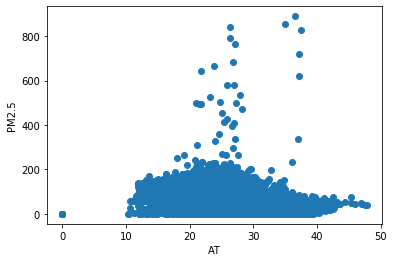

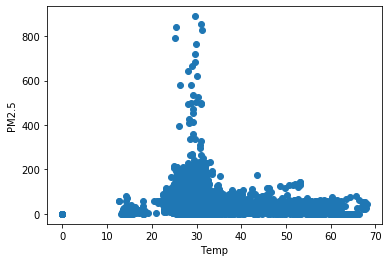

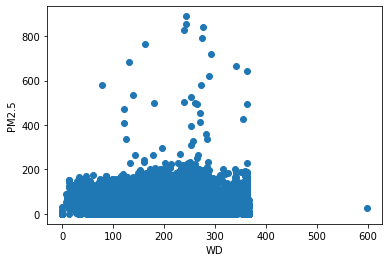

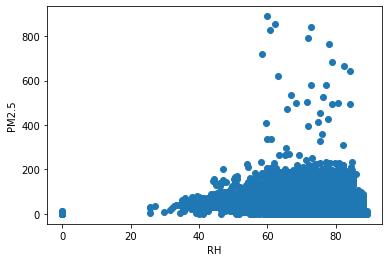

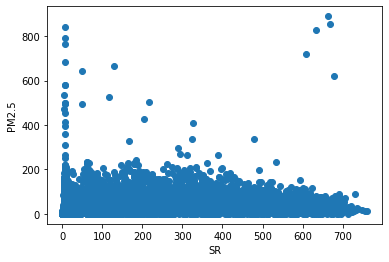

In [22]:
## Here we will compare the difference between All Meteorological feature with PM2.5

for feature in Meteo_feature:
        data=dataset.copy()
        plt.scatter(data[feature],data['PM2.5'])
        plt.xlabel(feature)
        plt.ylabel('PM2.5')
        plt.show()

#### So here we can see that if AT increase so Value of pm 2.5 will also increase and graph shows for all meteological features

### Numerical variables are usually of 2 type
#### Continous variable and Discrete Variables

In [23]:
## Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [24]:
## Continuous Variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 17


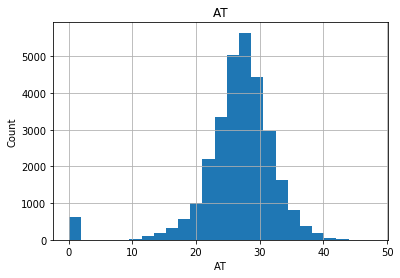

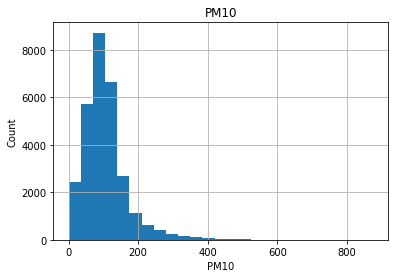

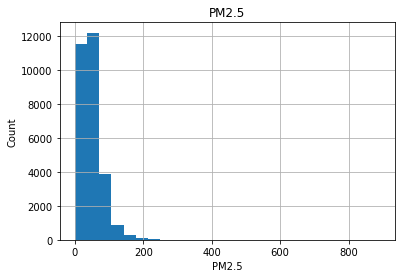

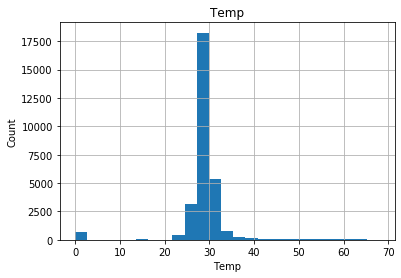

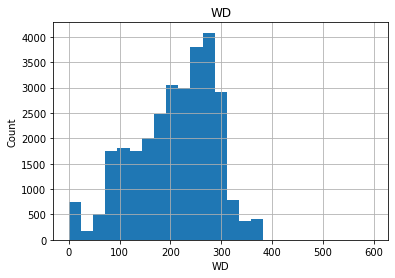

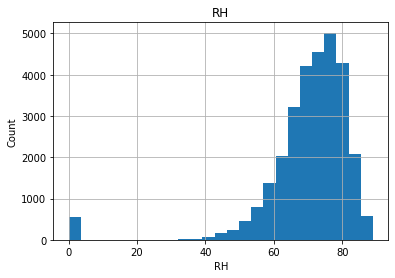

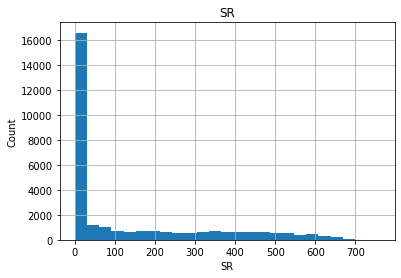

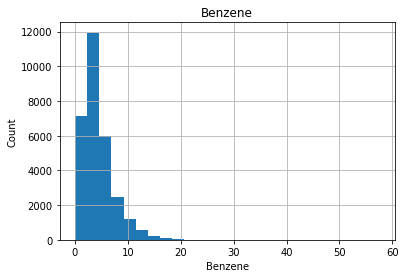

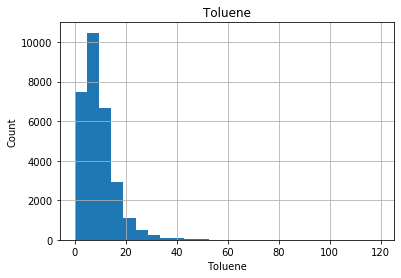

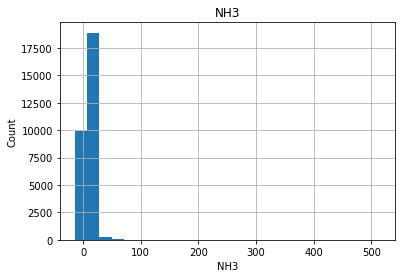

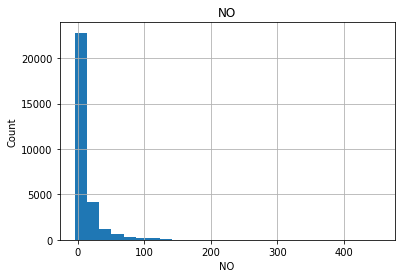

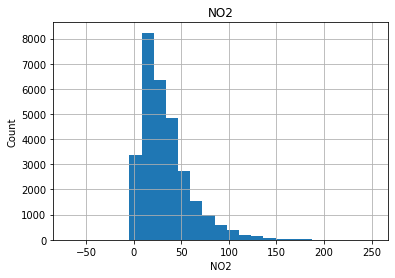

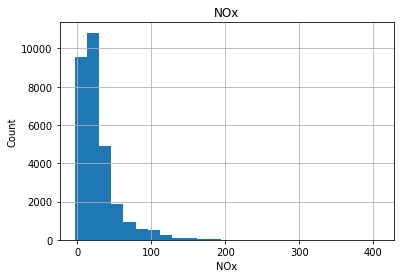

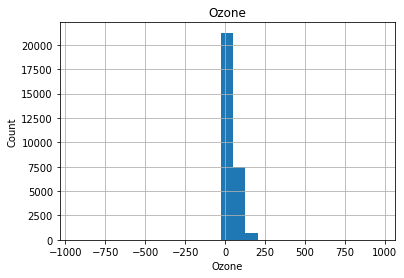

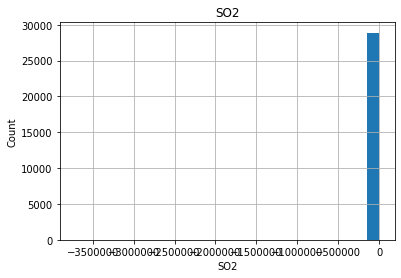

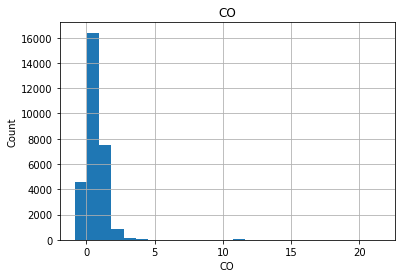

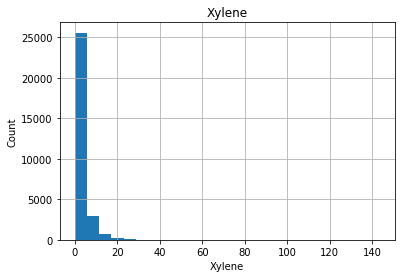

In [25]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


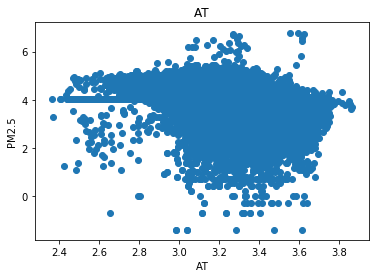

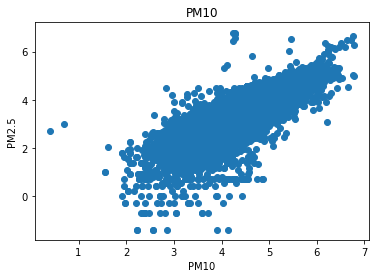

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


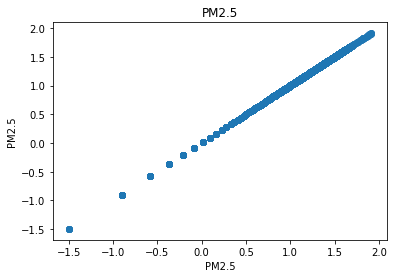

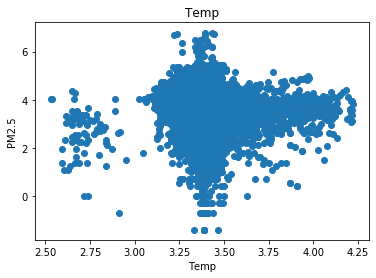

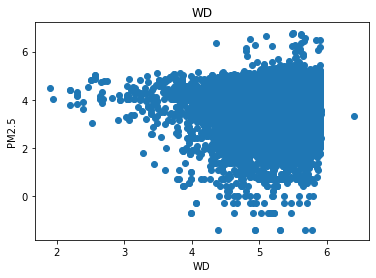

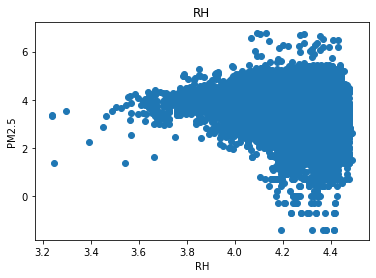

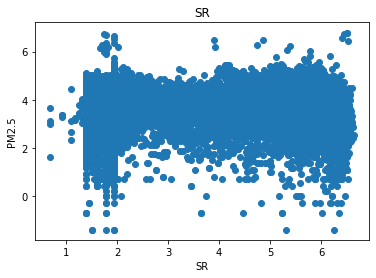

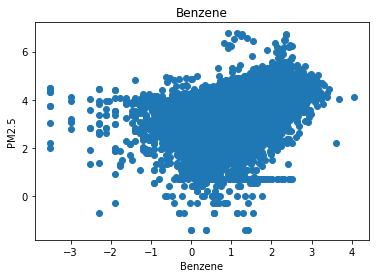

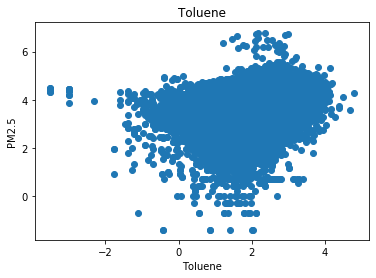

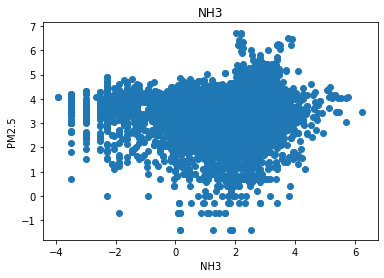

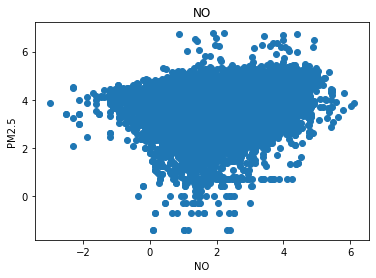

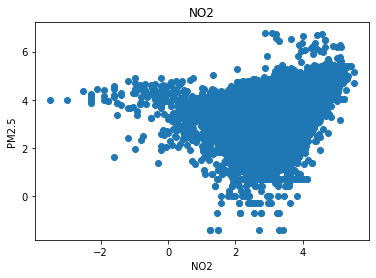

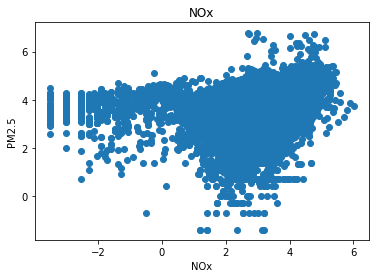

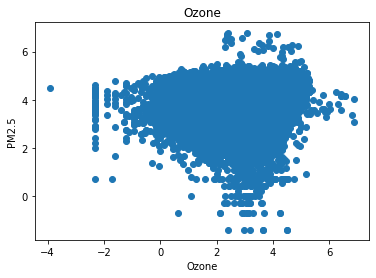

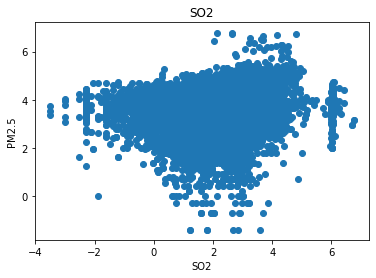

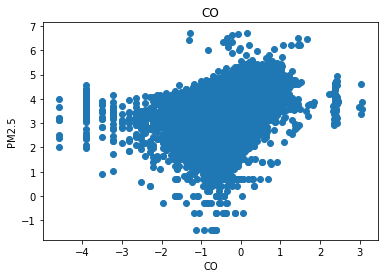

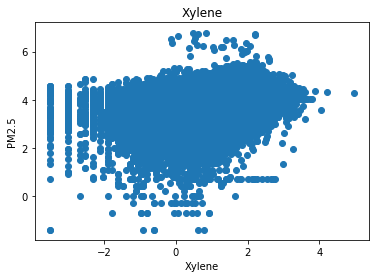

In [26]:
for feature in continuous_feature:
    data=dataset.copy()       
    data[feature]=np.log(data[feature])
    data['PM2.5']=np.log(data['PM2.5'])
    plt.scatter(data[feature],data['PM2.5'])
    plt.xlabel(feature)
    plt.ylabel('PM2.5')
    plt.title(feature)
    plt.show()


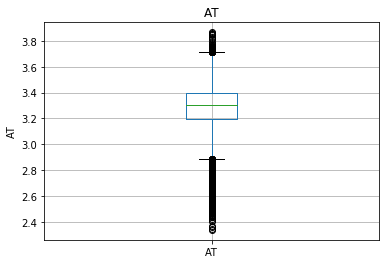

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


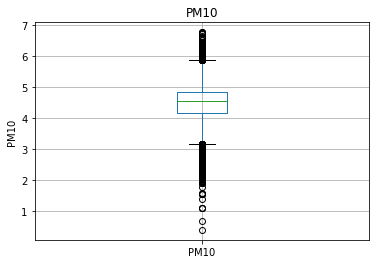

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


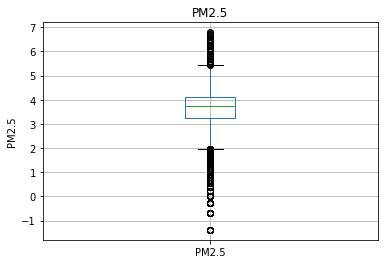

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


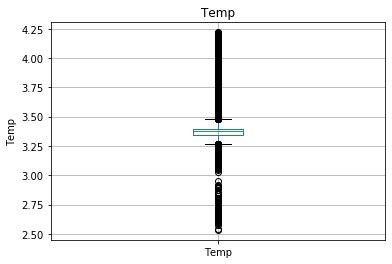

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


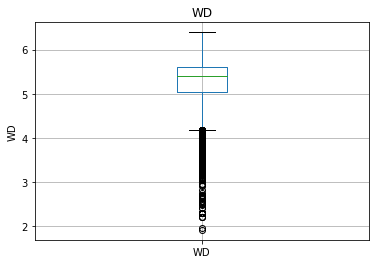

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


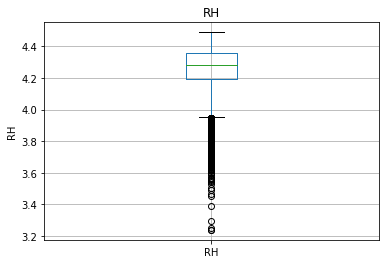

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


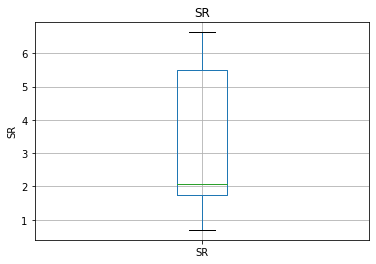

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


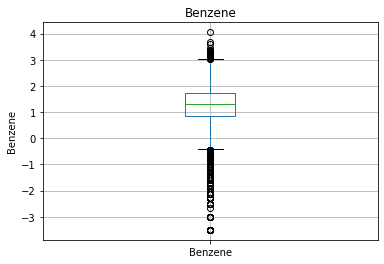

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


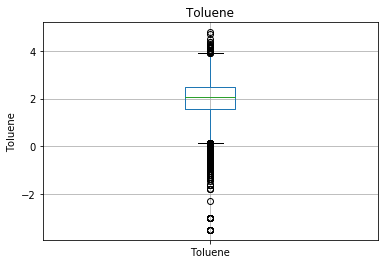

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


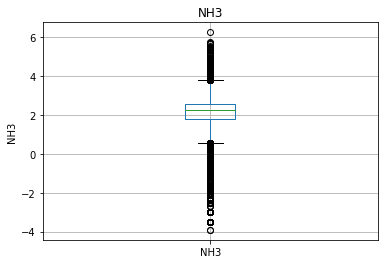

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


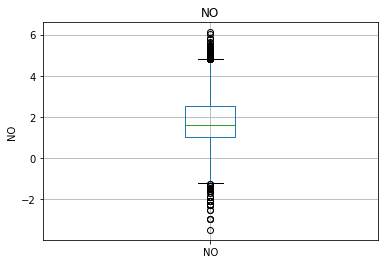

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


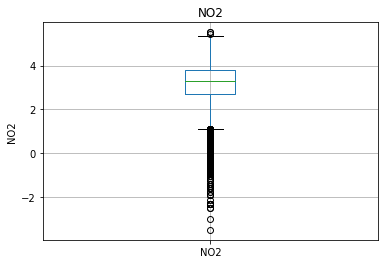

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


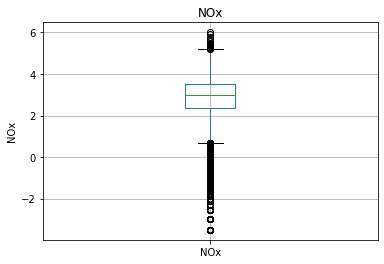

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


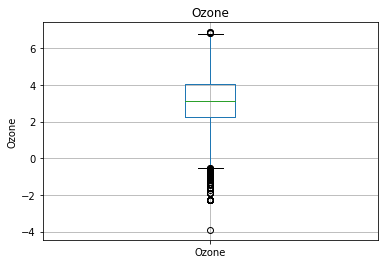

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


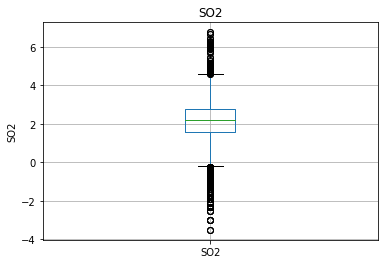

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


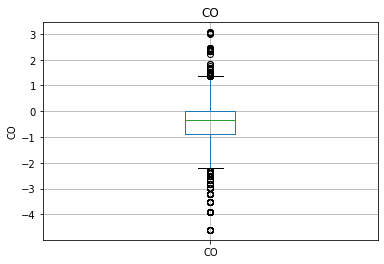

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


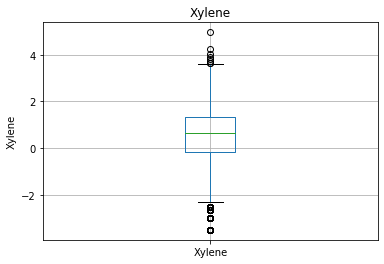

In [27]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Let's find the relationship between all the features

In [28]:
dataset.corr()

,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylene
AT,1.000000,0.047997,-0.069902,0.520086,0.387484,0.249867,0.472131,-0.009462,0.043084,0.074526,-0.113179,-0.122318,-0.124628,0.023057,-0.008695,-0.074874,-0.055419
PM10,0.047997,1.000000,0.768948,0.106185,0.106024,0.108247,-0.032480,0.438657,0.278545,0.215861,0.357320,0.545466,0.519454,0.082573,0.000032,0.307291,0.203686
PM2.5,-0.069902,0.768948,1.000000,0.109618,-0.013941,0.087000,-0.039377,0.340617,0.197041,0.229492,0.246784,0.460193,0.397360,0.253666,0.000734,0.289692,0.180941
Temp,0.520086,0.106185,0.109618,1.000000,0.331841,0.517444,0.103221,0.117398,0.095058,0.124796,0.062947,0.128244,0.104540,0.177346,-0.008319,0.121983,0.057596
WD,0.387484,0.106024,-0.013941,0.331841,1.000000,0.404478,-0.034541,0.169695,0.274699,0.014143,0.121588,0.136268,0.153147,-0.273846,-0.000345,-0.065433,0.079836
RH,0.249867,0.108247,0.087000,0.517444,0.404478,1.000000,-0.271917,0.170758,0.225393,0.048260,0.149521,0.150893,0.171656,-0.149765,0.002379,0.052076,0.104953
SR,0.472131,-0.032480,-0.039377,0.103221,-0.034541,-0.271917,1.000000,-0.127935,-0.133097,0.102706,-0.087618,-0.228485,-0.167991,0.171712,-0.009024,-0.031583,-0.117917
Benzene,-0.009462,0.438657,0.340617,0.117398,0.169695,0.170758,-0.127935,1.000000,0.722495,0.149621,0.447390,0.577891,0.559855,-0.125627,0.003468,0.382346,0.762198
Toluene,0.043084,0.278545,0.197041,0.095058,0.274699,0.225393,-0.133097,0.722495,1.000000,0.074041,0.367534,0.437770,0.446503,-0.229444,0.001001,0.205465,0.617400
NH3,0.074526,0.215861,0.229492,0.124796,0.014143,0.048260,0.102706,0.149621,0.074041,1.000000,0.102713,0.222924,0.180119,0.099326,-0.001186,0.185672,0.113305


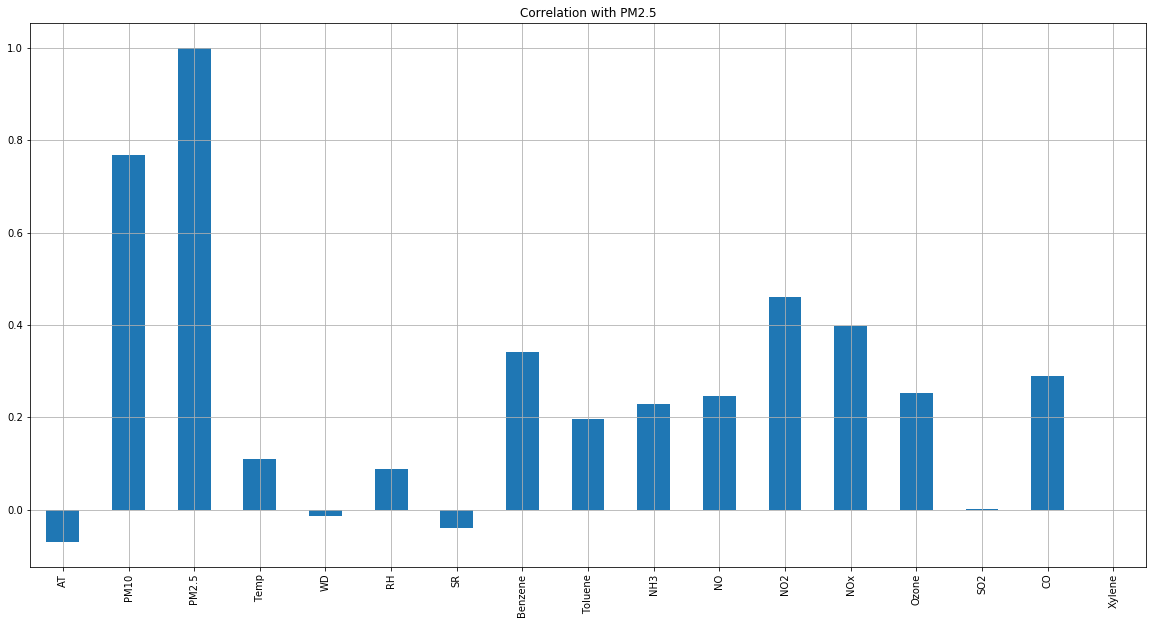

In [29]:
data.corrwith(dataset['PM2.5']).plot.bar(
        figsize = (20, 10), title = "Correlation with PM2.5", fontsize = 10,
        rot = 90, grid = True)

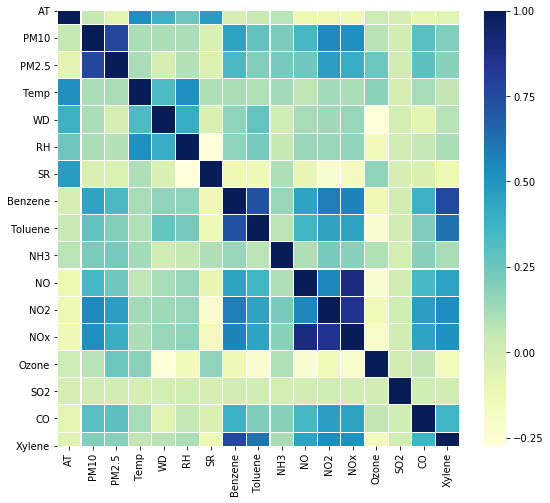

In [30]:
corrmat = dataset.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


### After analyzing the whole dataset we found that there is only numerical data available in our dataset so we have to only deal with missing value in Feature engineering phase


## Feature Engineering 

In [31]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

AT: 0.1031% missing value
PM10: 0.116% missing value
PM2.5: 0.1205% missing value
Temp: 0.0984% missing value
WD: 0.0983% missing value
RH: 0.0983% missing value
SR: 0.0983% missing value
Benzene: 0.0991% missing value
Toluene: 0.0991% missing value
NH3: 0.1131% missing value
NO: 0.0986% missing value
NO2: 0.1016% missing value
NOx: 0.0982% missing value
Ozone: 0.1034% missing value
SO2: 0.1215% missing value
CO: 0.1014% missing value
Xylene: 0.0991% missing value


In [32]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

AT         0
PM10       0
PM2.5      0
Temp       0
WD         0
RH         0
SR         0
Benzene    0
Toluene    0
NH3        0
NO         0
NO2        0
NOx        0
Ozone      0
SO2        0
CO         0
Xylene     0
dtype: int64

In [33]:
dataset.head(50)

,Time,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylene,ATnan,PM10nan,PM2.5nan,Tempnan,WDnan,RHnan,SRnan,Benzenenan,Toluenenan,NH3nan,NOnan,NO2nan,NOxnan,Ozonenan,SO2nan,COnan,Xylenenan
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,12:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,01:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,02:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,03:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,04:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,05:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,06:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,07:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,08:00:00,27.2,94.5,42.50,29.18,220.00,72.50,8.00,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.10,0.70,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [34]:
dataset.describe()

,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylene,ATnan,PM10nan,PM2.5nan,Tempnan,WDnan,RHnan,SRnan,Benzenenan,Toluenenan,NH3nan,NOnan,NO2nan,NOxnan,Ozonenan,SO2nan,COnan,Xylenenan
count,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.00000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,3.289300e+04,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000
mean,26.713366,103.604445,47.080678,28.915820,208.901727,70.521426,124.82684,4.262701,9.135331,10.036136,11.456309,32.643334,26.259324,36.061239,-9.813930e+01,0.753006,2.922718,0.103061,0.115952,0.120482,0.098380,0.098319,0.098319,0.098319,0.099079,0.099079,0.113064,0.098592,0.101633,0.098228,0.103396,0.121515,0.101420,0.099079
std,5.569855,62.134208,33.463221,5.469522,75.946843,12.319091,185.35298,2.911139,6.511966,9.050984,19.089711,25.077052,24.869976,40.489220,2.049520e+04,0.697004,3.621787,0.304044,0.320172,0.325529,0.297832,0.297750,0.297750,0.297750,0.298772,0.298772,0.316675,0.298119,0.302169,0.297627,0.304480,0.326730,0.301888,0.298772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-13.850000,-4.280000,-68.230000,-3.600000,-940.000000,-3.717037e+06,-0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.750000,70.000000,28.000000,28.480000,162.500000,67.000000,6.00000,2.500000,5.120000,6.370000,2.980000,16.250000,11.670000,10.520000,5.400000e+00,0.450000,0.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.200000,94.500000,42.500000,29.180000,220.000000,72.500000,8.00000,3.680000,8.030000,9.550000,4.850000,27.000000,19.460000,22.580000,9.100000e+00,0.700000,1.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.570000,123.250000,58.750000,29.780000,265.250000,77.500000,208.25000,5.300000,11.620000,12.520000,11.250000,42.200000,31.720000,51.970000,1.480000e+01,0.960000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.770000,875.000000,890.000000,68.020000,598.250000,89.000000,760.00000,57.520000,119.450000,514.000000,453.000000,251.200000,408.250000,967.630000,8.630500e+02,21.460000,143.420000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Since the numerical variables are skewed we will perform log normal distribution

Text(0.5, 1.0, 'PM2.5 vs Date')

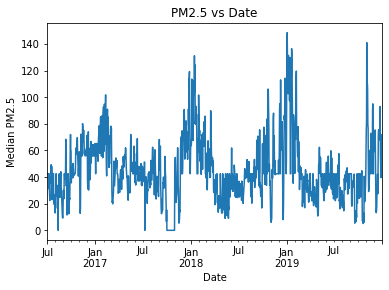

In [35]:
dataset.groupby('Date')['PM2.5'].median().plot()
plt.xlabel('Date')
plt.ylabel('Median PM2.5')
plt.title("PM2.5 vs Date")


In [36]:
dataset.isnull().values.any()

False

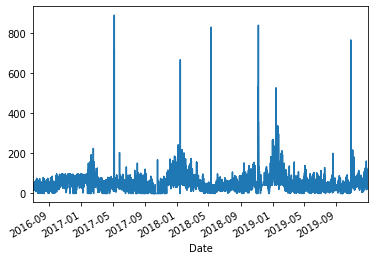

In [37]:
dataset['PM2.5'].plot()

In [38]:

X=dataset.drop(['PM2.5'],axis=1)


In [39]:
X.head()

,Time,AT,PM10,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylene,ATnan,PM10nan,PM2.5nan,Tempnan,WDnan,RHnan,SRnan,Benzenenan,Toluenenan,NH3nan,NOnan,NO2nan,NOxnan,Ozonenan,SO2nan,COnan,Xylenenan
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,12:00:00,27.2,94.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,01:00:00,27.2,94.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,02:00:00,27.2,94.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,03:00:00,27.2,94.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-07-01,04:00:00,27.2,94.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1.87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [40]:
dataset.drop(dataset.columns[[ 18, 19, 20]], axis = 1, inplace = True)

In [41]:
dataset.drop(dataset.columns[[17, 18, 19]], axis = 1, inplace = True)

In [42]:
dataset.drop(dataset.columns[[17, 18, 19]], axis = 1, inplace = True)

In [43]:
dataset.drop(dataset.columns[[17, 18, 19]], axis = 1, inplace = True)

In [44]:
 dataset.drop(dataset.columns[[17, 18, 19, 20, 21]], axis = 1, inplace = True)

In [45]:
dataset

,Time,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylenenan
Date,,,,,,,,,,,,,,,,,,
2016-07-01,12:00:00,27.20,94.5,42.50,29.18,220.00,72.50,8.0,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.1,0.70,1
2016-07-01,01:00:00,27.20,94.5,42.50,29.18,220.00,72.50,8.0,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.1,0.70,1
2016-07-01,02:00:00,27.20,94.5,42.50,29.18,220.00,72.50,8.0,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.1,0.70,1
2016-07-01,03:00:00,27.20,94.5,42.50,29.18,220.00,72.50,8.0,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.1,0.70,1
2016-07-01,04:00:00,27.20,94.5,42.50,29.18,220.00,72.50,8.0,3.68,8.03,9.55,4.85,27.00,19.46,22.58,9.1,0.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,20:00:00,19.23,94.5,48.25,30.05,84.50,66.75,7.0,5.17,9.40,10.35,2.10,46.02,26.18,79.72,0.9,1.02,0
2019-12-30,21:00:00,19.02,94.5,49.25,29.88,214.00,67.00,7.0,5.17,9.45,10.30,4.80,66.55,39.30,61.88,0.3,1.44,0
2019-12-30,22:00:00,18.30,94.5,56.75,29.70,248.25,67.25,7.0,6.33,12.25,10.40,3.08,55.60,32.05,61.25,0.9,1.23,0


In [46]:
dataset.to_excel('uni.xlsx')

In [47]:
test = dataset
# Target column
target_PM = pd.DataFrame(test['PM2.5'])
display(test.head())

,Time,AT,PM10,PM2.5,Temp,WD,RH,SR,Benzene,Toluene,NH3,NO,NO2,NOx,Ozone,SO2,CO,Xylenenan
Date,,,,,,,,,,,,,,,,,,
2016-07-01,12:00:00,27.2,94.5,42.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1
2016-07-01,01:00:00,27.2,94.5,42.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1
2016-07-01,02:00:00,27.2,94.5,42.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1
2016-07-01,03:00:00,27.2,94.5,42.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1
2016-07-01,04:00:00,27.2,94.5,42.5,29.18,220.0,72.5,8.0,3.68,8.03,9.55,4.85,27.0,19.46,22.58,9.1,0.7,1


In [48]:
# selecting Feature Columns
feature_columns = ['PM10', 'NO2', 'NOx', 'CO', 'Benzene', 'PM2.5']

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,PM10,NO2,NOx,CO,Benzene,PM2.5
Date,,,,,,
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753


In [50]:

display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_PM.shape)

# Shift target array because we want to predict the n + 1 day value


target_PM = target_PM.shift(-1)
validation_y = target_PM[-6000:-1]
target_PM = target_PM[:-6000]

# Taking last 6000 rows of data to be validation set
validation_X = feature_minmax_transform[-6000:-1]
feature_minmax_transform = feature_minmax_transform[:-6000]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_PM.shape)
display(target_PM.tail())

,PM10,NO2,NOx,CO,Benzene,PM2.5
Date,,,,,,
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753
2016-07-01,0.108,0.298125,0.055991,0.069058,0.063978,0.047753


Shape of features :  (32893, 6)
Shape of target :  (32893, 1)


,PM10,NO2,NOx,CO,Benzene,PM2.5
Date,,,,,,
2019-12-30,0.108,0.363867,0.075513,0.082063,0.095967,0.060112
2019-12-30,0.108,0.357668,0.072308,0.083408,0.089882,0.054213
2019-12-30,0.108,0.421939,0.104164,0.102242,0.089882,0.055337
2019-12-30,0.108,0.387659,0.086561,0.092825,0.110049,0.063764
2019-12-30,0.108,0.383746,0.090033,0.083408,0.099096,0.055337


,PM2.5
Date,
2019-12-30,48.25
2019-12-30,49.25
2019-12-30,56.75
2019-12-30,49.25
2019-12-30,47.00



 -----After process------ 

Shape of features :  (26893, 6)
Shape of target :  (26893, 1)


,PM2.5
Date,
2019-04-25,42.25
2019-04-25,42.50
2019-04-25,49.00
2019-04-25,46.00
2019-04-25,34.25


In [51]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_PM[:len(train_index)].values.ravel(), target_PM[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [52]:
X_train.shape

(24449, 6)

In [53]:
X_test.shape

(2444, 6)

In [54]:
y_train.shape

(24449,)

In [55]:
y_test.shape

(2444,)

In [56]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Pollutant')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  17.434423424478553
R2 score:  0.6287548750047813


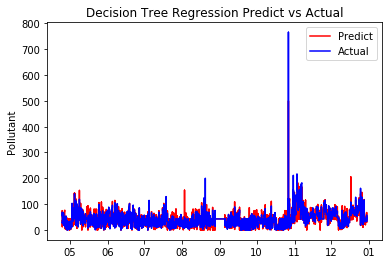

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')


In [58]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [59]:

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))


model_lstm.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Using TensorFlow backend.


Epoch 1/200
24449/24449 [==============================] - 3s 137us/step - loss: 2.5486
Epoch 2/200
24449/24449 [==============================] - 3s 126us/step - loss: 0.6578
Epoch 3/200
24449/24449 [==============================] - 3s 128us/step - loss: 0.5845
Epoch 4/200
24449/24449 [==============================] - 3s 126us/step - loss: 0.4989
Epoch 5/200
24449/24449 [==============================] - 3s 128us/step - loss: 0.4099
Epoch 6/200
24449/24449 [==============================] - 3s 128us/step - loss: 0.3153
Epoch 7/200
24449/24449 [==============================] - 3s 128us/step - loss: 0.2699
Epoch 8/200
24449/24449 [==============================] - 3s 130us/step - loss: 0.2523
Epoch 9/200
24449/24449 [==============================] - 3s 133us/step - loss: 0.2419
Epoch 10/200
24449/24449 [==============================] - 3s 125us/step - loss: 0.2335
Epoch 11/200
24449/24449 [==============================] - 3s 127us/step - loss: 0.2264
Epoch 12/200
24449/24449 [====

In [60]:

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)
print('LSTM: %f'%score_lstm)

The R2 score on the Train set is:	0.811
The R2 score on the Test set is:	0.576
2444/2444 [==============================] - 1s 406us/step
LSTM: 0.148755


In [61]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred_test_lstm))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 11.500


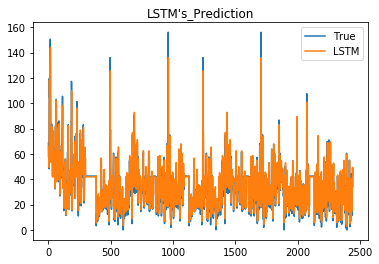

In [62]:

plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.legend()
plt.show()

In [63]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_lstm, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM.xlsx')